# Import package

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [101]:
#Import linear algebra and data manipulation
import numpy as np
import pandas as pd

#Import plotting packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
plt.style.use('fivethirtyeight')

#Import common utilities
import math
from collections import Counter

# statsmodels
import pylab
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels as statm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

#Import machine learning
# Predictive Model
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Imputer
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import Imputer
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor  
from sklearn.ensemble import RandomForestRegressor
import xgboost 

# Accuracy Evaluation
from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics
import sklearn.metrics as metrics
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import cross_val_score

# NLP
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import string
import nltk
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Configuration

In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 505)

# Load data

In [7]:
listings_df = pd.read_csv('D:\\MyProjects\\01_Airbnb\\Data\\seattle_listings.csv', sep=',')
listings_df.shape

(3818, 92)

# Data Preparation

### Check null values
   First, we start we a check for null values. This is because we can not use columns that has so many null values

In [8]:
def Check_Missing_Data(df):    
    # count all missing values of each column
    total = df.isnull().sum().sort_values(ascending=False)
    # calculate percentage of null values for each column
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

missing_values_df = Check_Missing_Data(listings_df)
missing_values_df

,Total,Percent
license,3818,1.000000
square_feet,3721,0.974594
monthly_price,2301,0.602672
security_deposit,1952,0.511262
weekly_price,1809,0.473808
notes,1606,0.420639
neighborhood_overview,1032,0.270299
cleaning_fee,1030,0.269775
transit,934,0.244631
host_about,859,0.224987


   => Most of the columns have between 0-30% of null ratio. Therefore, I decided to exclude from the analysis the columns with 30% or more of null ratio

In [9]:
missing_values_df[(missing_values_df.Percent < 0.3)].shape[0] 

86

   => This reduces the number of columns from 92 to 86

In [15]:
selected_cols = missing_values_df[(missing_values_df.Percent < 0.3)].index.values
selected_cols

array(['neighborhood_overview', 'cleaning_fee', 'transit', 'host_about',
       'host_acceptance_rate', 'review_scores_accuracy',
       'review_scores_checkin', 'review_scores_value',
       'review_scores_location', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_rating',
       'reviews_per_month', 'first_review', 'last_review', 'space',
       'host_response_time', 'host_response_rate', 'neighbourhood',
       'xl_picture_url', 'thumbnail_url', 'medium_url',
       'host_neighbourhood', 'summary', 'bathrooms', 'host_location',
       'zipcode', 'bedrooms', 'host_identity_verified',
       'host_has_profile_pic', 'host_picture_url', 'host_since',
       'host_total_listings_count', 'host_listings_count',
       'host_thumbnail_url', 'host_name', 'host_is_superhost', 'beds',
       'property_type', 'host_verifications', 'host_url', 'host_id',
       'picture_url', 'experiences_offered', 'description', 'name',
       'last_scraped', 'scrape_id', 'list

### Remove redundant columns 
Next, I will delete columns that seems not impact price (not contribute to predicting price) or columns that have only one single value

In [16]:
listings_df.apply(lambda x:x.unique().size,axis=0).reset_index()

,index,0
0,id,3818
1,listing_url,3818
2,scrape_id,1
3,last_scraped,1
4,name,3792
5,summary,3479
6,space,3120
7,description,3742
8,experiences_offered,1
9,neighborhood_overview,2507


In [12]:
removed_cols = [ 'transit', 'host_about','host_acceptance_rate', 'first_review', 'last_review',
        'xl_picture_url', 'thumbnail_url', 'medium_url','host_location','host_has_profile_pic', 
        'host_picture_url', 'host_thumbnail_url', 'host_name', 'host_url', 'host_id','picture_url', 
        'experiences_offered', 'name','last_scraped', 'scrape_id', 'listing_url', 'host_total_listings_count',
        'calendar_last_scraped','calendar_updated', 'has_availability','requires_license',
       'jurisdiction_names', 'instant_bookable', 'require_guest_profile_picture','host_neighbourhood'
       'require_guest_phone_verification','city', 'state', 'market','host_response_time','host_response_rate',
       'smart_location', 'country_code', 'country','is_location_exact', 'id','host_listings_count']

In [17]:
selected_cols = [e for e in selected_cols if e not in removed_cols]
selected_cols

['neighborhood_overview',
 'cleaning_fee',
 'review_scores_accuracy',
 'review_scores_checkin',
 'review_scores_value',
 'review_scores_location',
 'review_scores_cleanliness',
 'review_scores_communication',
 'review_scores_rating',
 'reviews_per_month',
 'space',
 'neighbourhood',
 'host_neighbourhood',
 'summary',
 'bathrooms',
 'zipcode',
 'bedrooms',
 'host_identity_verified',
 'host_since',
 'host_is_superhost',
 'beds',
 'property_type',
 'host_verifications',
 'description',
 'street',
 'latitude',
 'neighbourhood_cleansed',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'minimum_nights',
 'cancellation_policy',
 'require_guest_phone_verification',
 'maximum_nights',
 'extra_people',
 'neighbourhood_group_cleansed',
 'calculated_host_listings_count',
 'longitude',
 'guests_included',
 'room_type',
 'accommodates',
 'bed_type',
 'amenities',
 'price']

In [18]:
len(selected_cols)

46

   => This reduces the number of columns to 47

In [19]:
data_df = listings_df.copy(deep=True)
data_df = data_df[selected_cols]
data_df.shape

(3818, 46)

### Convert columns from string to numeric values

In [20]:
data_df['price'] = data_df['price'].str.replace("[$, ]", "").astype("float")
data_df['cleaning_fee'] = data_df['cleaning_fee'].str.replace("[$, ]", "").astype("float")
data_df['extra_people'] = data_df['extra_people'].str.replace("[$, ]", "").astype("float")

In [244]:
listings_df['price'] = listings_df['price'].str.replace("[$, ]", "").astype("float")
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].str.replace("[$, ]", "").astype("float")
listings_df['extra_people'] = listings_df['extra_people'].str.replace("[$, ]", "").astype("float")

### Select all numerical features

In [21]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','uint8']
numericdata = data_df.select_dtypes(include=numerics)
numericdata.shape       

(3818, 26)

   => There are 26 numerical features

In [22]:
Check_Missing_Data(numericdata)

,Total,Percent
cleaning_fee,1030,0.269775
review_scores_accuracy,658,0.172342
review_scores_checkin,658,0.172342
review_scores_value,656,0.171818
review_scores_location,655,0.171556
review_scores_cleanliness,653,0.171032
review_scores_communication,651,0.170508
review_scores_rating,647,0.169460
reviews_per_month,627,0.164222
bathrooms,16,0.004191


### Filling NA values for numeric features

In [23]:
#fill missing values for review scores columns
review_columns = ['review_scores_accuracy', 'review_scores_checkin', 'review_scores_value',
                  'review_scores_location', 'review_scores_cleanliness','review_scores_communication',
                  'review_scores_rating','reviews_per_month', 'cleaning_fee']
for column in review_columns:
    data_df[column].fillna(data_df[column].mean(), inplace = True)

numericdata = data_df.select_dtypes(include=numerics)
numericdata.shape 
Check_Missing_Data(numericdata)

,Total,Percent
bathrooms,16,0.004191
bedrooms,6,0.001572
beds,1,0.000262
price,0,0.000000
accommodates,0,0.000000
review_scores_accuracy,0,0.000000
review_scores_checkin,0,0.000000
review_scores_value,0,0.000000
review_scores_location,0,0.000000
review_scores_cleanliness,0,0.000000


In [24]:
#fill in missing values for bathrooms, bedrooms and beds with mode
data_df['bathrooms'] = data_df['bathrooms'].fillna(data_df['bathrooms'].mode()[0])
data_df['bedrooms'] = data_df['bedrooms'].fillna(data_df['bedrooms'].mode()[0])
data_df['beds'] = data_df['beds'].fillna(data_df['beds'].mode()[0])

numericdata = data_df.select_dtypes(include=numerics)
numericdata.shape 
Check_Missing_Data(numericdata)

,Total,Percent
price,0,0.0
accommodates,0,0.0
review_scores_accuracy,0,0.0
review_scores_checkin,0,0.0
review_scores_value,0,0.0
review_scores_location,0,0.0
review_scores_cleanliness,0,0.0
review_scores_communication,0,0.0
review_scores_rating,0,0.0
reviews_per_month,0,0.0


### Add log_price

In [25]:
data_df['log_price'] = data_df['price'].apply(lambda x: math.log(x))

### Seperate features and label 

In [167]:
col_list = list(numericdata.columns.values)
col_list = [e for e in col_list if e not in ['price','log_price']]
X_data = data_df.loc[:,col_list]       
Y_data = data_df.loc[numericdata.index.values,'log_price']
X_data.shape 

(3818, 25)

### Normalization

In [168]:
def Normalize_Data(X_data):    
    for col in X_data.columns.values:
        X_data[col] = X_data[col].astype(float)
        mean = np.mean(X_data[col])
        std = np.std(X_data[col])
        X_data[col] = X_data[col].apply(lambda x: (x - mean) / std)
    return X_data

X_data = Normalize_Data(X_data)
X_data.head()

,cleaning_fee,review_scores_accuracy,review_scores_checkin,review_scores_value,review_scores_location,review_scores_cleanliness,review_scores_communication,review_scores_rating,reviews_per_month,bathrooms,bedrooms,beds,latitude,availability_30,availability_60,availability_90,availability_365,number_of_reviews,minimum_nights,maximum_nights,extra_people,calculated_host_listings_count,longitude,guests_included,accommodates
0,-3.031586e-14,5.726658e-01,3.937630e-01,8.023812e-01,-1.063670e+00,6.112031e-01,3.679779e-01,7.654173e-02,1.195309e+00,-0.438461,-0.348068,-0.645342,0.170240,-0.228908,0.179356,0.379264,0.798601,4.897864,-0.083987,-0.246795,-0.322324,-0.160602,-1.194754,0.249756,0.329029
1,-5.204004e-01,5.726658e-01,3.937630e-01,8.023812e-01,6.831564e-01,6.112031e-01,3.679779e-01,2.426703e-01,-3.595500e-01,-0.438461,-0.348068,-0.645342,0.236078,-0.311063,-1.020585,-1.235563,0.364696,0.550724,-0.022651,-0.410158,-0.606680,0.518255,-1.025923,-0.513098,0.329029
2,5.711680e+00,5.726658e-01,3.937630e-01,8.023812e-01,6.831564e-01,6.112031e-01,3.679779e-01,4.087988e-01,-5.576595e-01,5.500872,4.183643,4.621311,0.017732,-1.296929,-1.320570,-1.206202,-0.195436,-0.058936,0.100020,-0.445801,0.815098,-0.160602,-1.146171,6.352583,3.869138
3,-3.031586e-14,1.119073e-14,-1.049403e-13,1.769432e-13,5.275077e-14,6.363495e-14,-1.304567e-13,-1.487322e-13,-1.439645e-14,-0.438461,-1.480996,0.232433,0.220980,-1.379085,-1.577700,-1.705330,-0.802903,-0.589075,-0.083987,0.204680,-0.606680,-0.330316,-1.139743,-0.513098,-0.176701
4,1.517011e+00,-1.002290e+00,3.937630e-01,-6.624741e-01,-1.063670e+00,-7.666159e-01,3.679779e-01,-4.218439e-01,-7.137458e-01,1.258492,1.917787,1.110209,0.091937,1.085580,0.993601,0.937113,0.948495,0.418189,-0.083987,0.204680,0.246387,-0.330316,-1.240293,3.301169,1.340489


### Split data to training set and test set

In [169]:
X_train, X_test, Y_train, Y_test=train_test_split(X_data,Y_data, test_size=0.3,train_size = 0.7,random_state=100)

# Important numerical feature selection 

### Multiple Linear Regression

#### Train model with all numeric features

In [170]:
def Model_LinearRegression1(X_data, Y_data):
    #add constant to data
    X = sm.add_constant(X_data)
    # Fit the linear model
    model = sm.OLS(Y_data, X)
    results = model.fit()
    return results.summary()

Model_LinearRegression1(X_train,Y_train) 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     128.1
Date:                Sun, 14 Apr 2019   Prob (F-statistic):               0.00
Time:                        06:52:46   Log-Likelihood:                -1184.1
No. Observations:                2672   AIC:                             2420.
Df Residuals:                    2646   BIC:                             2573.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              4.6810      0.007    634.772      0.000       4.667       4.695
cleaning_fee                       0.1248      0.010     12.538      0.000       0.105       0.144
review_scores_accuracy             0.0417      0.010      4.096      0.000       0.022       0.062
review_scores_checkin             -0.0263      0.011     -2.456      0.014      -0.047      -0.005
review_scores_value               -0.0824      0.011     -7.664      0.000      -0.103      -0.061
review_scores_location             0.0629      0.008      7.639      0.000       0.047       0.079
review_scores_cleanliness          0.0238      0.010      2.289      0.022       0.003       0.044
review_scores_communication        0.0109      0.011      1.022      0.307      -0.010       0.032
review_scores_rating               0.0192      0.013      1.505      0.132      -0.006       0.044
reviews_per_month                 -0.0575      0.009     -6.182      0.000      -0.076      -0.039
bathrooms                          0.0186      0.009      2.011      0.044       0.000       0.037
bedrooms                           0.0346      0.014      2.559      0.011       0.008       0.061
beds                              -0.0619      0.015     -4.014      0.000      -0.092      -0.032
latitude                          -0.0259      0.007     -3.462      0.001      -0.041      -0.011
availability_30                    0.0188      0.023      0.799      0.424      -0.027       0.065
availability_60                    0.0179      0.049      0.366      0.715      -0.078       0.114
availability_90                   -0.0505      0.037     -1.355      0.175      -0.123       0.023
availability_365                   0.0152      0.010      1.551      0.121      -0.004       0.034
number_of_reviews                 -0.0008      0.009     -0.080      0.936      -0.019       0.018
minimum_nights                     0.0657      0.050      1.311      0.190      -0.033       0.164
maximum_nights                     0.0067      0.026      0.259      0.796      -0.044       0.058
extra_people                       0.0141      0.008      1.785      0.074      -0.001       0.030
calculated_host_listings_count    -0.0586      0.008     -7.446      0.000      -0.074      -0.043
longitude                         -0.0286      0.008     -3.803      0.000      -0.043      -0.014
guests_included                    0.0229      0.010      2.389      0.017       0.004       0.042
accommodates                       0.2990      0.017     17.759      0.000       0.266       0.332
==============================================================================
Omnibus:                       36.813   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (J

   => Insignificant features: 'review_scores_checkin','review_scores_communication','bathrooms','availability_30','availability_60','availability_90','availability_365,'number_of_reviews','minimum_nights','maximum_nights','extra_people'

#### remove insignificant features

In [57]:
remove_list = ['review_scores_communication',
               'availability_30','availability_60','availability_90','availability_365',
               'number_of_reviews','minimum_nights','maximum_nights','extra_people']
col_list1 = [e for e in col_list if e not in remove_list]

In [60]:
X1_train = X_train[col_list1]
X1_test = X_test[col_list1]
X1_train.shape[1]

16

#### Retrain model with significant features

In [59]:
Model_LinearRegression1(X1_train,Y_train) 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     199.2
Date:                Sat, 13 Apr 2019   Prob (F-statistic):               0.00
Time:                        23:56:15   Log-Likelihood:                -1189.8
No. Observations:                2672   AIC:                             2414.
Df Residuals:                    2655   BIC:                             2514.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              4.6804      0.007    638.031      0.000       4.666       4.695
cleaning_fee                       0.1252      0.010     12.673      0.000       0.106       0.145
review_scores_accuracy             0.0415      0.010      4.094      0.000       0.022       0.061
review_scores_checkin             -0.0220      0.009     -2.404      0.016      -0.040      -0.004
review_scores_value               -0.0819      0.011     -7.661      0.000      -0.103      -0.061
review_scores_location             0.0644      0.008      7.850      0.000       0.048       0.080
review_scores_cleanliness          0.0232      0.010      2.239      0.025       0.003       0.044
review_scores_rating               0.0222      0.013      1.769      0.077      -0.002       0.047
reviews_per_month                 -0.0614      0.008     -7.898      0.000      -0.077      -0.046
bathrooms                          0.0192      0.009      2.076      0.038       0.001       0.037
bedrooms                           0.0348      0.013      2.594      0.010       0.009       0.061
beds                              -0.0619      0.015     -4.025      0.000      -0.092      -0.032
latitude                          -0.0258      0.007     -3.446      0.001      -0.040      -0.011
calculated_host_listings_count    -0.0589      0.008     -7.602      0.000      -0.074      -0.044
longitude                         -0.0291      0.008     -3.872      0.000      -0.044      -0.014
guests_included                    0.0288      0.009      3.285      0.001       0.012       0.046
accommodates                       0.2985      0.017     17.763      0.000       0.266       0.331
==============================================================================
Omnibus:                       36.280   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.896
Skew:                          -0.013   Prob(JB):                     8.09e-15
Kurtosis:                       3.763   Cond. No.                         5.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Split data into training set and test set

In [34]:
def Model_LinearRegression3(X_train, Y_train, X_test, Y_test, flg = 0):
    # Choose a class of model
    from sklearn.linear_model import LinearRegression
    # Choose model hyperparameters
    model = LinearRegression(fit_intercept=True)
    # Fit the model to the train data set
    model.fit(X_train, Y_train)    
    # prediction
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)        
    # Evaluating Model Accuracy 
    Regression_Metrics(model,X_train, Y_train,Y_train_pred,X_test,Y_test,Y_test_pred)
    
    if(flg == 1):    
        return model, Y_train_pred, Y_test_pred

def Regression_Metrics(model, x_train, y_train, y_train_pred, x_test, y_test, y_test_pred):  
    
    print('Train R-squared: %.4f' % model.score(x_train, y_train))
    print('Test R-squared: %.4f' % model.score(x_test, y_test))
    print()  
    print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
    print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


In [61]:
model, Y_train_pred, Y_test_pred  = Model_LinearRegression3(X1_train,Y_train,X1_test,Y_test,1)  

Train R-squared: 0.5456
Test R-squared: 0.5120

Train RMSE: 0.3777062934667205
Test RMSE: 0.40324905431532715


#### Important Features

In [194]:
def Visualize_ImportantFeatures(X_train,model_feature_importances_):
    # Variable Importance
    feature_labels = X_train.columns
    # Get numerical feature importance
    importances = list(model_feature_importances_)
    # List of tuples with variable and importance
    feature_importances = [(feature, np.abs(round(importance, 2))) for feature, importance in zip(feature_labels, importances)]
    # Sort the feature importance by most important first
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    # Print out the feature and importance 
    [print('{:50} Importance: {}'.format(*pair)) for pair in feature_importances];

    # Visualizations  
    plt.figure(figsize = (15,8))
    # list of x locations for plotting
    feature_labels = [pair[0] for pair in feature_importances];
    x_values = list(range(len(feature_labels)))
    y_values = [pair[1] for pair in feature_importances];
    # Make a bar chart
    plt.bar(x_values, y_values, orientation = 'vertical')
    # Tick labels for x axis
    plt.xticks(x_values, feature_labels, rotation='vertical')
    # Axis labels and title
    plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
 

In [195]:
Visualize_ImportantFeatures(X1_train,model.coef_) 

0.2

   => The most important features in multiple linear regression: accommodates, cleaning_fee, review_scores_value, review_scores_location, calculated_host_listings_count, beds, reviews_per_month

#### Cross validation

In [64]:
def CV_Model(model,X, Y):
    cv_scores = cross_val_score(model, X_data, Y_data, scoring = 'r2', cv = 10)
    rmse = np.sqrt(-cross_val_score(model, X_data, Y_data, scoring="neg_mean_squared_error", cv = 10))
    print('r2 score: ',cv_scores)
    print( "Average r2 score: ", np.round( np.mean( cv_scores ), 2 ) )
    print( "Average rmse score: ", np.round( np.mean( rmse ), 2 ) )

In [65]:
X1_data = X_data[col_list1]
X1_data.shape

CV_Model(linear_model.LinearRegression(),X1_data,Y_data)

r2 score:  [0.66971734 0.59155222 0.55265229 0.2211334  0.35065171 0.30956138
 0.45976912 0.49070999 0.45499872 0.50208961]
Average r2 score:  0.46
Average rmse score:  0.4


### Random Forest 

#### Split data into training set and test set

In [68]:
def Model_RandomForest(X_train, Y_train, X_test, Y_test, flg = 0):   
    # train model
    model = RandomForestRegressor(n_estimators = 100, random_state=42)
    # predicting label
    model.fit(X_train, Y_train)
    #Default parameters our model used
    model.get_params()    
    # predicting
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)            
    # Evaluating Model Accuracy 
    Regression_Metrics(model,X_train, Y_train,Y_train_pred,X_test,Y_test,Y_test_pred)  
    
    if(flg == 1):    
        return model, Y_train_pred, Y_test_pred    

In [70]:
X_train.shape

(2672, 25)

In [67]:
model, Y_train_pred, Y_test_pred = Model_RandomForest(X_train, Y_train,X_test,Y_test,1)

Train R-squared: 0.9522
Test R-squared: 0.6727

Train RMSE: 0.12249422845167057
Test RMSE: 0.3302818191233967


bedrooms                                           Importance: 0.37
accommodates                                       Importance: 0.12
latitude                                           Importance: 0.09
cleaning_fee                                       Importance: 0.08
longitude                                          Importance: 0.06
reviews_per_month                                  Importance: 0.04
bathrooms                                          Importance: 0.04
availability_365                                   Importance: 0.03
review_scores_rating                               Importance: 0.02
number_of_reviews                                  Importance: 0.02
minimum_nights                                     Importance: 0.02
calculated_host_listings_count                     Importance: 0.02
review_scores_value                                Importance: 0.01
review_scores_location                             Importance: 0.01
review_scores_cleanliness                       

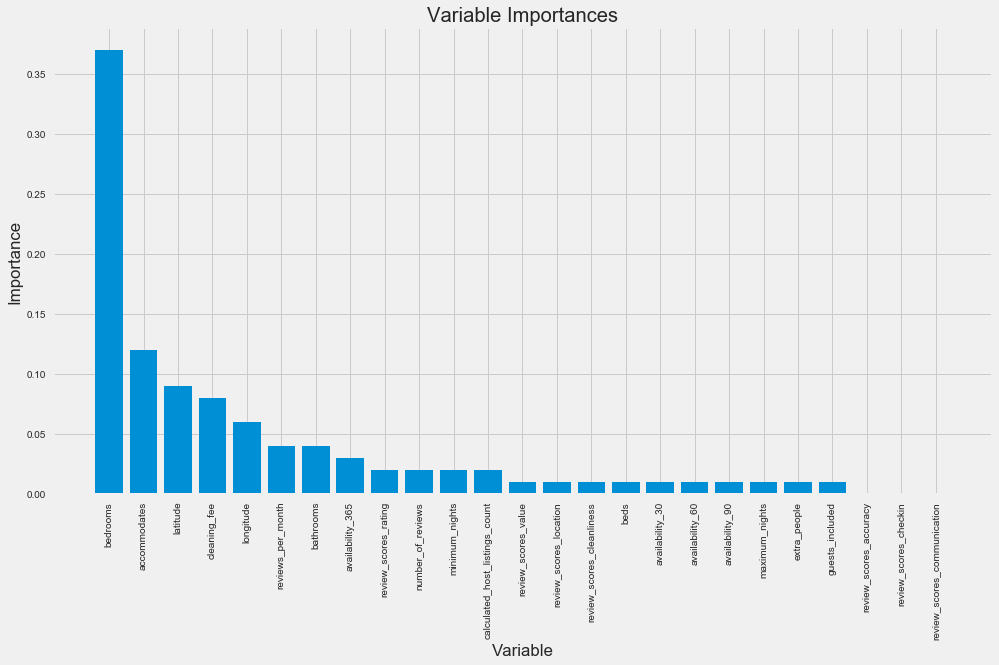

In [71]:
Visualize_ImportantFeatures(X_train,model.feature_importances_)   

   * The most important features: bedrooms, accommodates, latitude, cleaning_fee, longitude, reviews_per_month, bathrooms => Compare to Linear Regression model, the results are different for review_scores_accuracy
   * insignificant features: review_scores_accuracy, review_scores_checkin, review_scores_communication => Compare to Linear Regression Model, there are some differences: availability_365, minimum_nights, number_of_reviews are quite significant in Random forest but insignificant in Linear Regression and has been removed

#### remove insignificant features

In [72]:
remove_list = ['review_scores_communication','review_scores_checkin','review_scores_accuracy']
col_list1 = [e for e in col_list if e not in remove_list]

In [73]:
X1_train = X_train[col_list1]
X1_test = X_test[col_list1]
X1_train.shape[1]

22

#### Retrain model with significant features

In [74]:
model, Y_train_pred, Y_test_pred = Model_RandomForest(X1_train, Y_train,X1_test,Y_test,1)

Train R-squared: 0.9524
Test R-squared: 0.6724

Train RMSE: 0.12224112494474411
Test RMSE: 0.3304068287337447


bedrooms                                           Importance: 0.37
accommodates                                       Importance: 0.12
latitude                                           Importance: 0.09
cleaning_fee                                       Importance: 0.08
longitude                                          Importance: 0.06
reviews_per_month                                  Importance: 0.04
bathrooms                                          Importance: 0.04
availability_365                                   Importance: 0.03
review_scores_rating                               Importance: 0.02
number_of_reviews                                  Importance: 0.02
minimum_nights                                     Importance: 0.02
extra_people                                       Importance: 0.02
calculated_host_listings_count                     Importance: 0.02
review_scores_value                                Importance: 0.01
review_scores_location                          

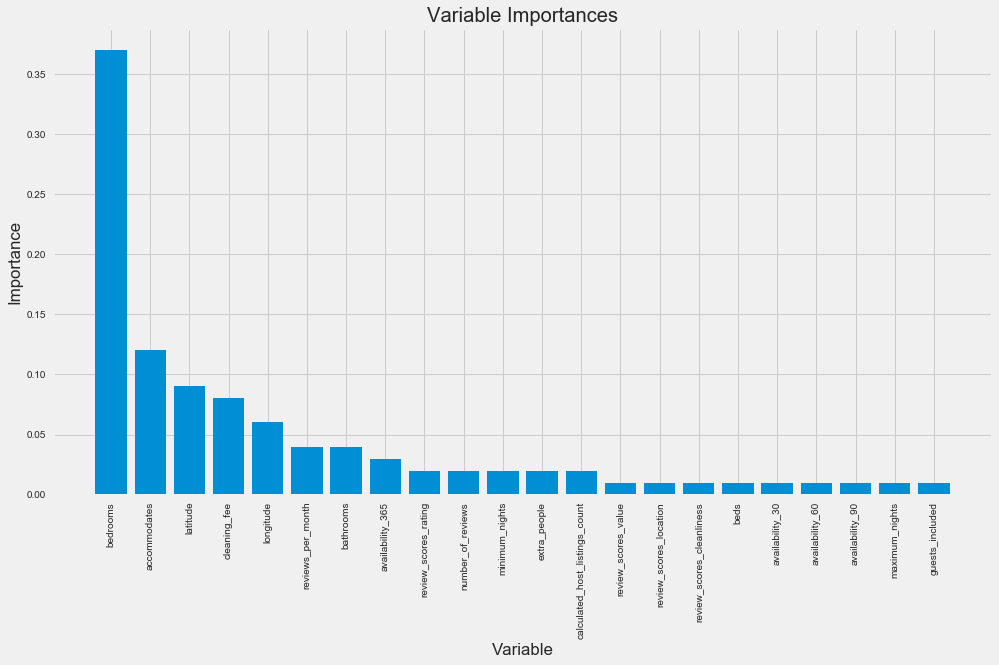

In [75]:
Visualize_ImportantFeatures(X1_train,model.feature_importances_) 

#### Cross validation

In [78]:
X1_data = X_data[col_list1]
X1_data.shape

RandomForestRegressor(n_estimators=100)
CV_Model(model,X1_data, Y_data)

r2 score:  [0.71982314 0.69489714 0.64902653 0.5080075  0.55826918 0.59628882
 0.67364221 0.59464509 0.61126383 0.57977352]
Average r2 score:  0.62
Average rmse score:  0.34


### Boosting Tree

#### Split data into training set and test set

In [88]:
def Model_GBT(X_train, Y_train, X_test, Y_test,flg=0): 
    # train model
    model = GradientBoostingRegressor(n_estimators = 100, random_state=42)
    model.fit(X_train, Y_train)
    #Default parameters our model used
    model.get_params()    
    # Predicting label
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)    
    # Evaluating Model Accuracy 
    Regression_Metrics(model,X_train, Y_train,Y_train_pred,X_test,Y_test,Y_test_pred)
    
    if(flg == 1):    
        return model, Y_train_pred, Y_test_pred    

In [89]:
model, Y_train_pred, Y_test_pred = Model_GBT(X_train, Y_train,X_test,Y_test,1)

Train R-squared: 0.7591
Test R-squared: 0.6759

Train RMSE: 0.27498558980796134
Test RMSE: 0.3286226659982657


availability_30                                    Importance: 0.46000000834465027
cleaning_fee                                       Importance: 0.029999999329447746
latitude                                           Importance: 0.029999999329447746
accommodates                                       Importance: 0.029999999329447746
availability_90                                    Importance: 0.019999999552965164
availability_365                                   Importance: 0.019999999552965164
number_of_reviews                                  Importance: 0.019999999552965164
calculated_host_listings_count                     Importance: 0.019999999552965164
guests_included                                    Importance: 0.019999999552965164
review_scores_value                                Importance: 0.009999999776482582
review_scores_location                             Importance: 0.009999999776482582
review_scores_cleanliness                          Importance: 0.009999999776

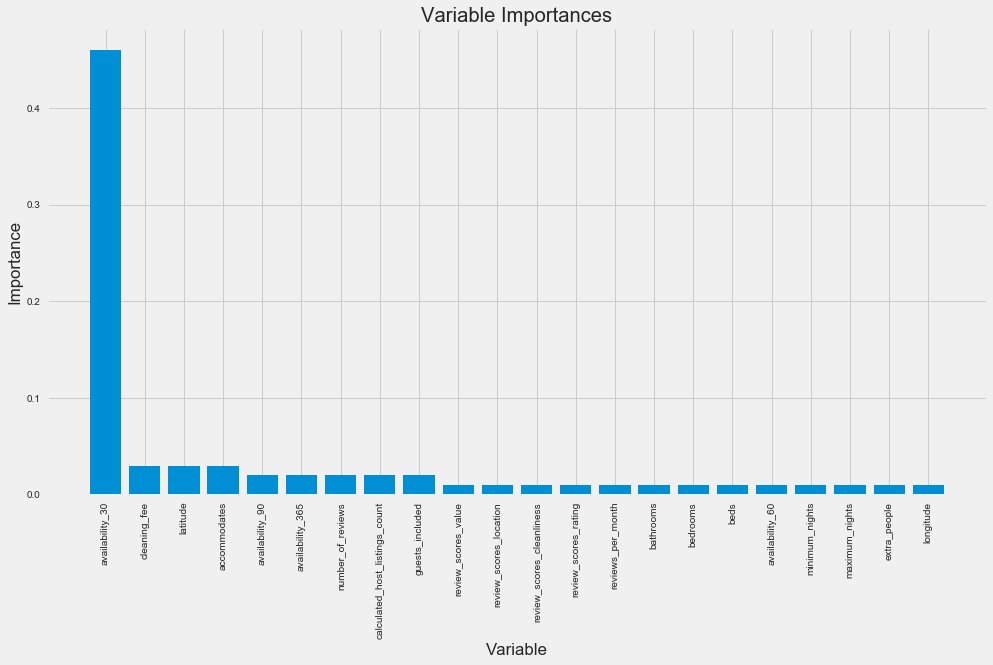

In [108]:
 Visualize_ImportantFeatures(X1_train,model.feature_importances_)  

#### remove insignificant features

In [91]:
remove_list = ['review_scores_communication']
col_list1 = [e for e in col_list if e not in remove_list]

In [92]:
X1_train = X_train[col_list1]
X1_test = X_test[col_list1]
X1_train.shape[1]

22

#### Retrain model with significant features

In [94]:
model, Y_train_pred, Y_test_pred = Model_GBT(X1_train, Y_train,X1_test,Y_test,1)

Train R-squared: 0.7596
Test R-squared: 0.6773

Train RMSE: 0.2747180793872562
Test RMSE: 0.3279347886716253


#### Cross validation

In [98]:
X1_data = X_data[col_list1]
X1_data.shape

model = GradientBoostingRegressor(n_estimators=100)
CV_Model(model,X1_data,Y_data)

r2 score:  [0.74192448 0.7165683  0.64481745 0.46647145 0.539628   0.62984071
 0.69848968 0.59948844 0.63530196 0.60036672]
Average r2 score:  0.63
Average rmse score:  0.33


### XGBoost

In [104]:
#train XGBoost model
model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
model.fit(X_train,Y_train)

#calculate and print scores for the model for top 15 features
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(Y_train, Y_train_pred),
        mean_squared_error(Y_test, Y_test_pred)))
print('R^2 train 1: %.3f, test: %.3f' % (
        r2_score(Y_train, Y_train_pred),
        r2_score(Y_test, Y_test_pred)))

print('R^2 train 2: %.3f, test: %.3f' % (
        model.score(X_train, Y_train),
        model.score(X_test, Y_test)))


MSE train: 0.023, test: 0.103
R^2 train 1: 0.926, test: 0.692
R^2 train 2: 0.926, test: 0.692


In [129]:
def Model_XGBoost(X_train, Y_train, X_test, Y_test,flg=0):
    model = xgboost.XGBRegressor(n_estimators=100, random_state=42)
    # train model
    model.fit(X_train,Y_train)
    #calculate and print scores for the model for top 15 features
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    # Evaluating Model Accuracy 
    Regression_Metrics(model,X_train, Y_train,Y_train_pred,X_test,Y_test,Y_test_pred)
    
    if(flg == 1):    
        return model, Y_train_pred, Y_test_pred        

In [130]:
model, Y_train_pred, Y_test_pred = Model_XGBoost(X_train, Y_train,X_test,Y_test,1)

Train R-squared: 0.7559
Test R-squared: 0.6787

Train RMSE: 0.27681844195952293
Test RMSE: 0.3272249338310705


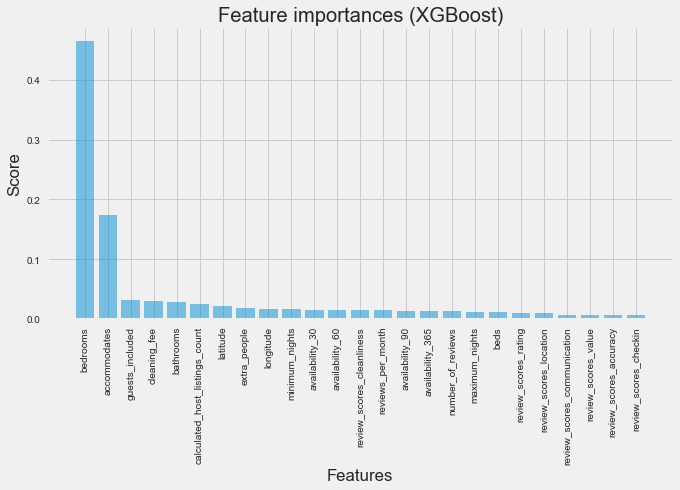

In [106]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, model.feature_importances_), key=lambda x: x[1] * -1)
feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances for top 15 features
features = feature_importances['name']
y_pos = np.arange(len(features))
scores = feature_importances['score']
 
plt.figure(figsize=(10,5))
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances (XGBoost)')
plt.show()

bedrooms                                           Importance: 0.46000000834465027
accommodates                                       Importance: 0.17000000178813934
cleaning_fee                                       Importance: 0.029999999329447746
bathrooms                                          Importance: 0.029999999329447746
guests_included                                    Importance: 0.029999999329447746
latitude                                           Importance: 0.019999999552965164
availability_30                                    Importance: 0.019999999552965164
availability_60                                    Importance: 0.019999999552965164
minimum_nights                                     Importance: 0.019999999552965164
extra_people                                       Importance: 0.019999999552965164
calculated_host_listings_count                     Importance: 0.019999999552965164
longitude                                          Importance: 0.0199999995529

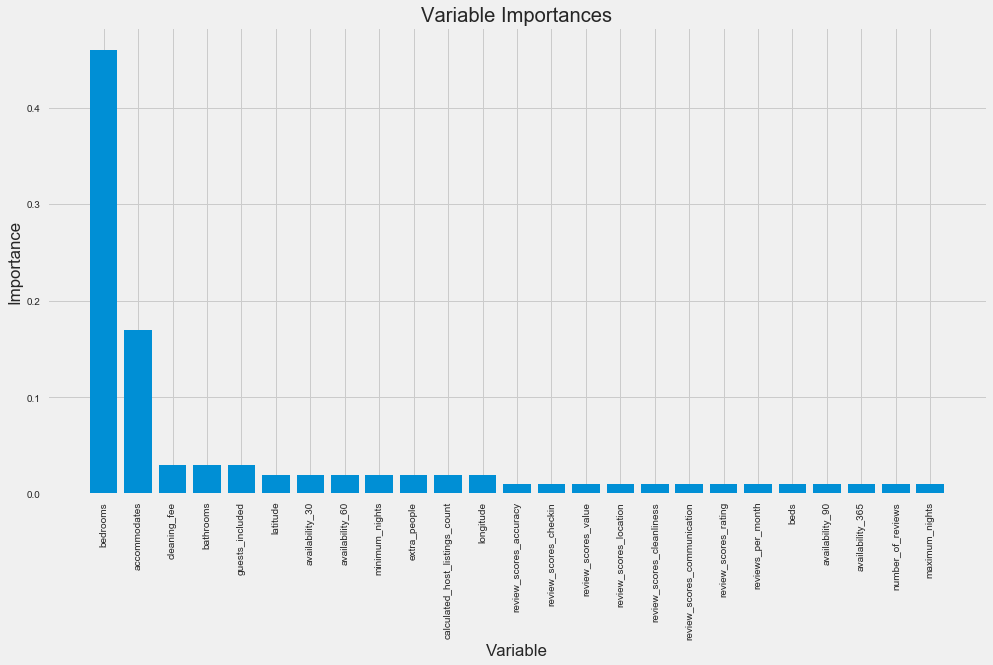

In [122]:
Visualize_ImportantFeatures(X_train,model.feature_importances_.round(3))

#### Cross validation

In [131]:
model = xgboost.XGBRegressor(n_estimators=100)
CV_Model(model,X_data,Y_data)

r2 score:  [0.74322744 0.71826333 0.65167748 0.47107986 0.53924619 0.64085441
 0.70246008 0.60417218 0.63434123 0.60590376]
Average r2 score:  0.63
Average rmse score:  0.33


### Summary
   * There are several difference in the list of important features as well as insignificant features among the models. this should be investigated further the approaches to measure the importance of features to understand the underlying reason. however, for now, the GBT and XGBoost yeild the best performance, hence deciding significant features for constructing prediction models are based on the result from these models which include all features except for 'review_scores_communication'

In [279]:
remove_list = ['review_scores_communication']
col_list = [e for e in col_list if e not in remove_list]
len(col_list)

24

In [280]:
X_train = X_train[col_list]
X_test = X_test[col_list]
X_data = X_data[col_list]
X_train.shape[1]

24

# Add categorical features

### room_type

## Create dummary variables: app 1

In [281]:
# Approach 1:create dummy variables
room_type = data_df.loc[data_df.room_type.isnull(),'room_type']
room_dummies = pd.get_dummies(data_df[['room_type']], prefix='room_type', prefix_sep='_')
room_dummies.head()

,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [181]:
X_bk = X_data.copy(deep=True)

In [282]:
X_data = pd.concat((X_data,room_dummies.astype(int)),axis=1)

In [283]:
X_train, X_test, Y_train, Y_test=train_test_split(X_data,Y_data, test_size=0.3,train_size = 0.7,random_state=100)

In [284]:
X_train.shape 

(2672, 27)

In [285]:
X_train.columns

Index(['cleaning_fee', 'review_scores_accuracy', 'review_scores_checkin', 'review_scores_value', 'review_scores_location', 'review_scores_cleanliness', 'review_scores_rating', 'reviews_per_month', 'bathrooms', 'bedrooms', 'beds', 'latitude', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'minimum_nights', 'maximum_nights', 'extra_people', 'calculated_host_listings_count', 'longitude', 'guests_included', 'accommodates', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

In [156]:

# X_data = X_data.rename(index=str, columns={"room_type_Entire home/apt": "room_type_Entire_apt", 
                                  "room_type_Private room": "room_type_Private_room",
                                  "room_type_Shared room": "room_type_Shared_room"})
# X_train = X_train.rename(index=str, columns={"room_type_Entire home/apt": "room_type_Entire_apt", 
                                  "room_type_Private room": "room_type_Private_room",
                                  "room_type_Shared room": "room_type_Shared_room"})

In [214]:
Check_Missing_Data(X_data)

,Total,Percent
room_type_Shared room,0,0.0
room_type_Private room,0,0.0
review_scores_accuracy,0,0.0
review_scores_checkin,0,0.0
review_scores_value,0,0.0
review_scores_location,0,0.0
review_scores_cleanliness,0,0.0
review_scores_rating,0,0.0
reviews_per_month,0,0.0
bathrooms,0,0.0


#### Linear Regression

In [188]:
CV_Model(linear_model.LinearRegression(),X_data,Y_data)

r2 score:  [0.75097035 0.68931864 0.6692181  0.39911372 0.52516382 0.50334923
 0.43792489 0.61901062 0.58899074 0.62341248]
Average r2 score:  0.58
Average rmse score:  0.35


In [215]:
CV_Model(linear_model.LinearRegression(),X_data,Y_data)

r2 score:  [0.75097035 0.68931864 0.66922763 0.39911372 0.52516382 0.50352507
 0.43792489 0.61901062 0.58899074 0.62341248]
Average r2 score:  0.58
Average rmse score:  0.35


In [186]:
Model_LinearRegression1(X_train,Y_train) 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     191.3
Date:                Sun, 14 Apr 2019   Prob (F-statistic):               0.00
Time:                        06:58:39   Log-Likelihood:                -830.23
No. Observations:                2672   AIC:                             1714.
Df Residuals:                    2645   BIC:                             1873.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              3.3242      0.011    308.427      0.000       3.303       3.345
cleaning_fee                       0.0845      0.009      9.566      0.000       0.067       0.102
review_scores_accuracy             0.0235      0.009      2.631      0.009       0.006       0.041
review_scores_checkin             -0.0202      0.008     -2.508      0.012      -0.036      -0.004
review_scores_value               -0.0636      0.009     -6.757      0.000      -0.082      -0.045
review_scores_location             0.0518      0.007      7.157      0.000       0.038       0.066
review_scores_cleanliness          0.0077      0.009      0.847      0.397      -0.010       0.026
review_scores_rating               0.0406      0.011      3.685      0.000       0.019       0.062
reviews_per_month                 -0.0551      0.008     -6.762      0.000      -0.071      -0.039
bathrooms                          0.0542      0.008      6.588      0.000       0.038       0.070
bedrooms                           0.1015      0.012      8.417      0.000       0.078       0.125
beds                              -0.0453      0.014     -3.343      0.001      -0.072      -0.019
latitude                          -0.0234      0.007     -3.566      0.000      -0.036      -0.011
availability_30                    0.0203      0.021      0.986      0.324      -0.020       0.061
availability_60                    0.0437      0.043      1.019      0.309      -0.040       0.128
availability_90                   -0.0495      0.033     -1.516      0.130      -0.113       0.015
availability_365                   0.0266      0.009      3.098      0.002       0.010       0.043
number_of_reviews                 -0.0014      0.008     -0.164      0.870      -0.018       0.015
minimum_nights                    -0.0535      0.044     -1.213      0.225      -0.140       0.033
maximum_nights                    -0.0050      0.023     -0.218      0.828      -0.050       0.040
extra_people                       0.0107      0.007      1.546      0.122      -0.003       0.024
calculated_host_listings_count    -0.0277      0.007     -3.809      0.000      -0.042      -0.013
longitude                         -0.0213      0.007     -3.233      0.001      -0.034      -0.008
guests_included                    0.0239      0.008      2.850      0.004       0.007       0.040
accommodates                       0.1341      0.016      8.451      0.000       0.103       0.165
room_type_Entire home/apt          1.5095      0.013    112.721      0.000       1.483       1.536
room_type_Private room             1.0765      0.014     78.493      0.000       1.050       1.103
room_type_Shared room              0.7383      0.030     24.445      0.000       0.679       0.798
==============

In [216]:
Model_LinearRegression1(X_train,Y_train) 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     191.3
Date:                Sun, 14 Apr 2019   Prob (F-statistic):               0.00
Time:                        08:05:58   Log-Likelihood:                -830.23
No. Observations:                2672   AIC:                             1714.
Df Residuals:                    2645   BIC:                             1873.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              4.8337      0.009    568.446      0.000       4.817       4.850
cleaning_fee                       0.0845      0.009      9.566      0.000       0.067       0.102
review_scores_accuracy             0.0235      0.009      2.631      0.009       0.006       0.041
review_scores_checkin             -0.0202      0.008     -2.508      0.012      -0.036      -0.004
review_scores_value               -0.0636      0.009     -6.757      0.000      -0.082      -0.045
review_scores_location             0.0518      0.007      7.157      0.000       0.038       0.066
review_scores_cleanliness          0.0077      0.009      0.847      0.397      -0.010       0.026
review_scores_rating               0.0406      0.011      3.685      0.000       0.019       0.062
reviews_per_month                 -0.0551      0.008     -6.762      0.000      -0.071      -0.039
bathrooms                          0.0542      0.008      6.588      0.000       0.038       0.070
bedrooms                           0.1015      0.012      8.417      0.000       0.078       0.125
beds                              -0.0453      0.014     -3.343      0.001      -0.072      -0.019
latitude                          -0.0234      0.007     -3.566      0.000      -0.036      -0.011
availability_30                    0.0203      0.021      0.986      0.324      -0.020       0.061
availability_60                    0.0437      0.043      1.019      0.309      -0.040       0.128
availability_90                   -0.0495      0.033     -1.516      0.130      -0.113       0.015
availability_365                   0.0266      0.009      3.098      0.002       0.010       0.043
number_of_reviews                 -0.0014      0.008     -0.164      0.870      -0.018       0.015
minimum_nights                    -0.0535      0.044     -1.213      0.225      -0.140       0.033
maximum_nights                    -0.0050      0.023     -0.218      0.828      -0.050       0.040
extra_people                       0.0107      0.007      1.546      0.122      -0.003       0.024
calculated_host_listings_count    -0.0277      0.007     -3.809      0.000      -0.042      -0.013
longitude                         -0.0213      0.007     -3.233      0.001      -0.034      -0.008
guests_included                    0.0239      0.008      2.850      0.004       0.007       0.040
accommodates                       0.1341      0.016      8.451      0.000       0.103       0.165
room_type_Private room            -0.4330      0.017    -25.497      0.000      -0.466      -0.400
room_type_Shared room             -0.7711      0.042    -18.421      0.000      -0.853      -0.689
==============================================================================
Omnibus:                      127.

In [197]:
model, Y_train_pred, Y_test_pred  = Model_LinearRegression3(X_train,Y_train,X_test,Y_test,1) 

Train R-squared: 0.6528
Test R-squared: 0.6151

Train RMSE: 0.3301445099811365
Test RMSE: 0.35813317811628015


In [217]:
model, Y_train_pred, Y_test_pred  = Model_LinearRegression3(X_train,Y_train,X_test,Y_test,1) 

Train R-squared: 0.6528
Test R-squared: 0.6151

Train RMSE: 0.3301445099811365
Test RMSE: 0.35813317811628037


room_type_Entire home/apt                          Importance: 0.4
room_type_Shared room                              Importance: 0.37
accommodates                                       Importance: 0.13
bedrooms                                           Importance: 0.1
cleaning_fee                                       Importance: 0.08
review_scores_value                                Importance: 0.06
reviews_per_month                                  Importance: 0.06
review_scores_location                             Importance: 0.05
bathrooms                                          Importance: 0.05
beds                                               Importance: 0.05
availability_90                                    Importance: 0.05
minimum_nights                                     Importance: 0.05
review_scores_rating                               Importance: 0.04
availability_60                                    Importance: 0.04
availability_365                                  

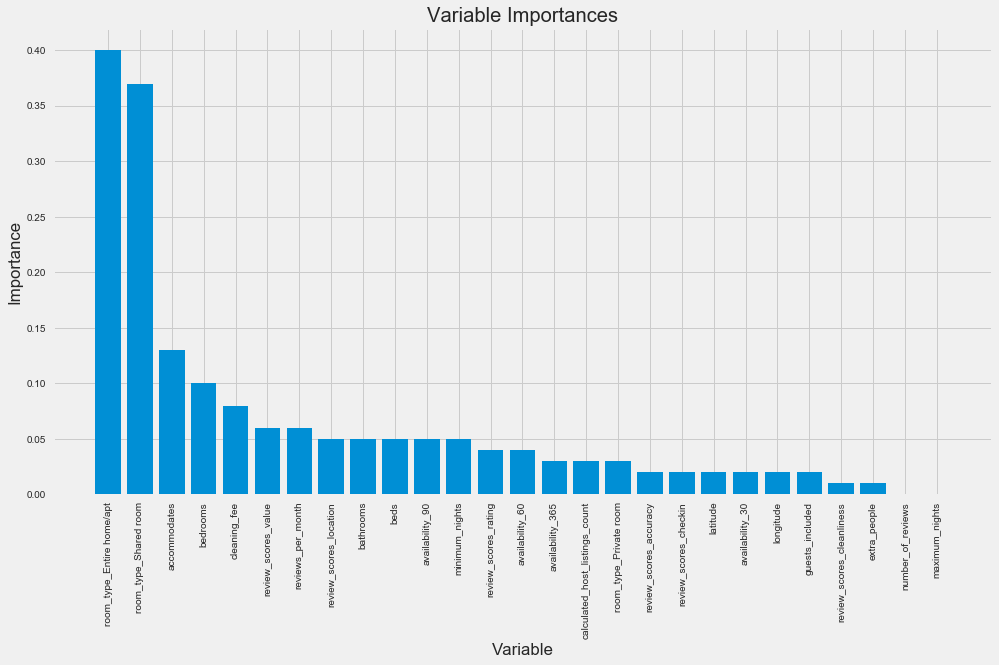

In [199]:
Visualize_ImportantFeatures(X_train,model.coef_) 

room_type_Shared room                              Importance: 0.77
room_type_Private room                             Importance: 0.43
accommodates                                       Importance: 0.13
bedrooms                                           Importance: 0.1
cleaning_fee                                       Importance: 0.08
review_scores_value                                Importance: 0.06
reviews_per_month                                  Importance: 0.06
review_scores_location                             Importance: 0.05
bathrooms                                          Importance: 0.05
beds                                               Importance: 0.05
availability_90                                    Importance: 0.05
minimum_nights                                     Importance: 0.05
review_scores_rating                               Importance: 0.04
availability_60                                    Importance: 0.04
availability_365                                 

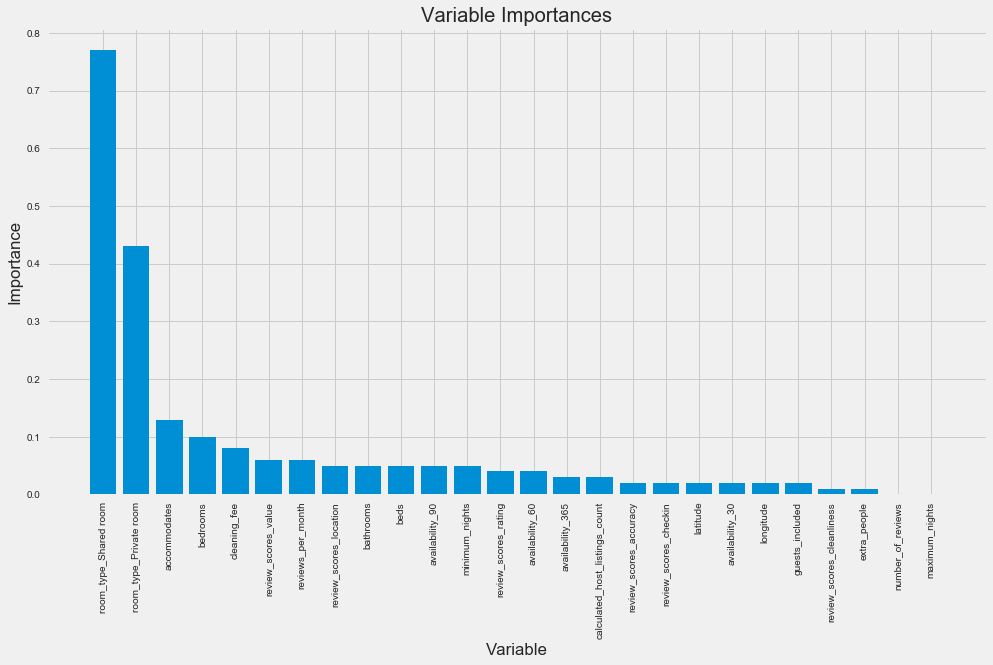

In [218]:
Visualize_ImportantFeatures(X_train,model.coef_) 

#### Random Forest

In [191]:
model = RandomForestRegressor(n_estimators=100)
CV_Model(model,X_data,Y_data)

r2 score:  [0.76885097 0.72035433 0.69657025 0.50931481 0.61011529 0.63605216
 0.72880998 0.66635283 0.61506051 0.65793373]
Average r2 score:  0.66
Average rmse score:  0.32


In [219]:
model = RandomForestRegressor(n_estimators=100)
CV_Model(model,X_data,Y_data)

r2 score:  [0.77088874 0.72303768 0.68114584 0.53039901 0.60112884 0.62904563
 0.72751177 0.66023137 0.61765522 0.64675106]
Average r2 score:  0.66
Average rmse score:  0.32


In [200]:
model, Y_train_pred, Y_test_pred = Model_RandomForest(X_train, Y_train,X_test,Y_test,1)

Train R-squared: 0.9579
Test R-squared: 0.7245

Train RMSE: 0.11500118554638705
Test RMSE: 0.3030217409736643


In [220]:
model, Y_train_pred, Y_test_pred = Model_RandomForest(X_train, Y_train,X_test,Y_test,1)

Train R-squared: 0.9578
Test R-squared: 0.7190

Train RMSE: 0.11511018131424522
Test RMSE: 0.3060313084818302


room_type_Entire home/apt                          Importance: 0.3
bedrooms                                           Importance: 0.14
bathrooms                                          Importance: 0.11
latitude                                           Importance: 0.07
cleaning_fee                                       Importance: 0.05
longitude                                          Importance: 0.05
accommodates                                       Importance: 0.05
reviews_per_month                                  Importance: 0.03
availability_90                                    Importance: 0.02
availability_365                                   Importance: 0.02
number_of_reviews                                  Importance: 0.02
calculated_host_listings_count                     Importance: 0.02
review_scores_location                             Importance: 0.01
review_scores_cleanliness                          Importance: 0.01
review_scores_rating                             

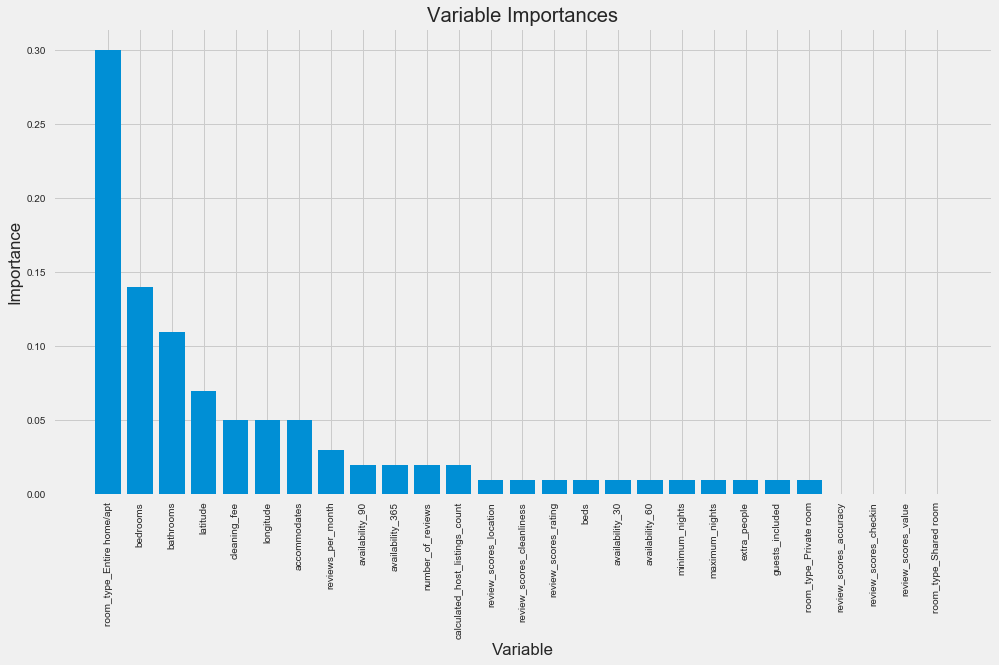

In [201]:
Visualize_ImportantFeatures(X_train,model.feature_importances_) 

bedrooms                                           Importance: 0.37
room_type_Private room                             Importance: 0.09
latitude                                           Importance: 0.07
room_type_Shared room                              Importance: 0.07
cleaning_fee                                       Importance: 0.05
longitude                                          Importance: 0.05
accommodates                                       Importance: 0.04
reviews_per_month                                  Importance: 0.03
bathrooms                                          Importance: 0.03
availability_365                                   Importance: 0.03
availability_90                                    Importance: 0.02
number_of_reviews                                  Importance: 0.02
review_scores_location                             Importance: 0.01
review_scores_cleanliness                          Importance: 0.01
review_scores_rating                            

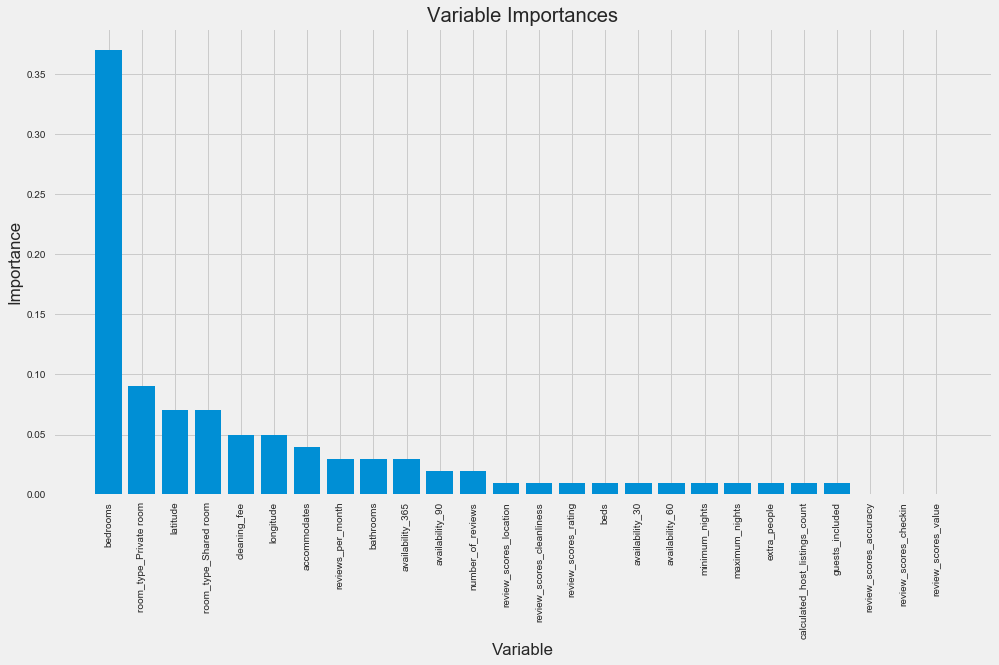

In [221]:
Visualize_ImportantFeatures(X_train,model.feature_importances_) 

#### Gradient Boosting Tree

In [203]:
model = GradientBoostingRegressor(n_estimators=100)
CV_Model(model,X_data,Y_data)

r2 score:  [0.778252   0.73874931 0.70232794 0.50468096 0.60313079 0.67766386
 0.7339084  0.65867489 0.65958435 0.67073617]
Average r2 score:  0.67
Average rmse score:  0.31


In [222]:
model = GradientBoostingRegressor(n_estimators=100)
CV_Model(model,X_data,Y_data)

r2 score:  [0.77856071 0.74326804 0.69635493 0.50765534 0.60550985 0.68242538
 0.74167902 0.66803022 0.66010076 0.66992977]
Average r2 score:  0.68
Average rmse score:  0.31


In [204]:
model, Y_train_pred, Y_test_pred = Model_GBT(X_train, Y_train,X_test,Y_test,1)

Train R-squared: 0.7851
Test R-squared: 0.7258

Train RMSE: 0.25970895990836407
Test RMSE: 0.30230319733084626


In [223]:
model, Y_train_pred, Y_test_pred = Model_GBT(X_train, Y_train,X_test,Y_test,1)

Train R-squared: 0.7868
Test R-squared: 0.7212

Train RMSE: 0.2587020976355849
Test RMSE: 0.30483498469243925


latitude                                           Importance: 0.14
accommodates                                       Importance: 0.1
reviews_per_month                                  Importance: 0.07
longitude                                          Importance: 0.07
bedrooms                                           Importance: 0.06
cleaning_fee                                       Importance: 0.05
bathrooms                                          Importance: 0.05
number_of_reviews                                  Importance: 0.05
extra_people                                       Importance: 0.05
availability_365                                   Importance: 0.04
room_type_Entire home/apt                          Importance: 0.04
review_scores_rating                               Importance: 0.03
availability_30                                    Importance: 0.03
minimum_nights                                     Importance: 0.03
calculated_host_listings_count                   

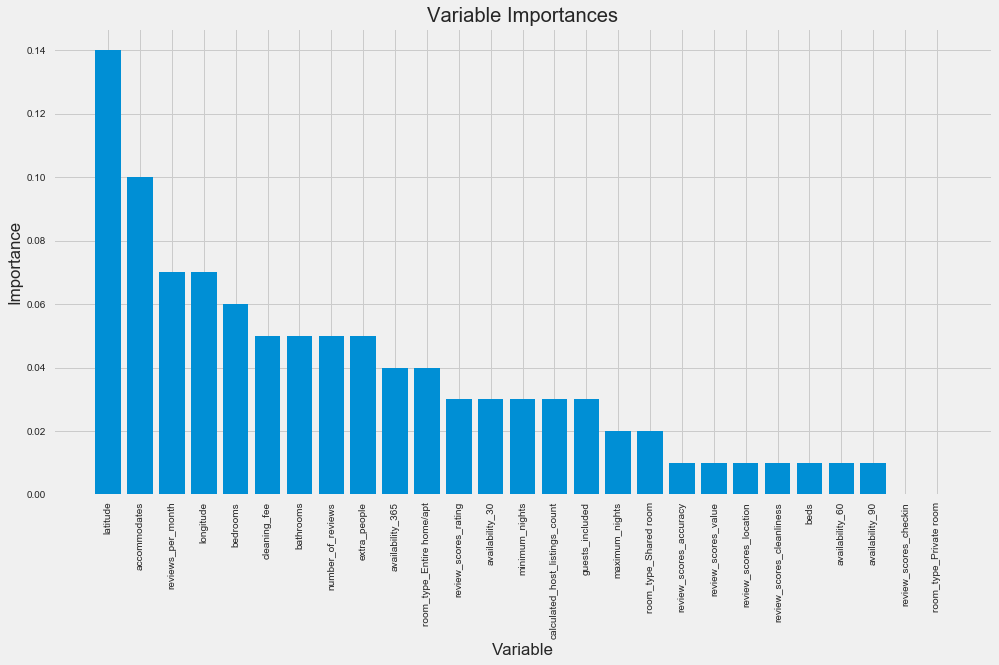

In [205]:
Visualize_ImportantFeatures(X_train,model.feature_importances_) 

latitude                                           Importance: 0.14
accommodates                                       Importance: 0.1
longitude                                          Importance: 0.08
reviews_per_month                                  Importance: 0.07
bedrooms                                           Importance: 0.07
cleaning_fee                                       Importance: 0.06
availability_365                                   Importance: 0.05
number_of_reviews                                  Importance: 0.05
extra_people                                       Importance: 0.05
calculated_host_listings_count                     Importance: 0.04
guests_included                                    Importance: 0.04
review_scores_rating                               Importance: 0.03
bathrooms                                          Importance: 0.03
availability_30                                    Importance: 0.03
minimum_nights                                   

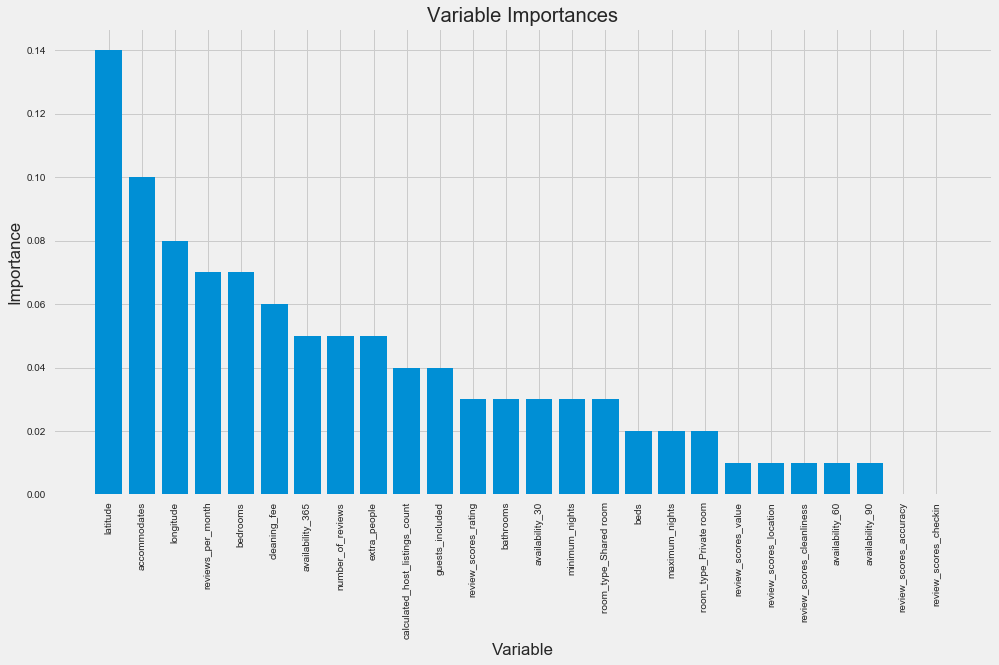

In [224]:
Visualize_ImportantFeatures(X_train,model.feature_importances_) 

#### XGBoost

In [206]:
model = xgboost.XGBRegressor(n_estimators=100)
CV_Model(model,X_data,Y_data)

r2 score:  [0.78295963 0.74317105 0.69341756 0.51031138 0.60924488 0.68657049
 0.73883788 0.66038872 0.65731473 0.6699087 ]
Average r2 score:  0.68
Average rmse score:  0.31


In [226]:
model = xgboost.XGBRegressor(n_estimators=100)
CV_Model(model,X_data,Y_data)

r2 score:  [0.77662106 0.74707778 0.69893378 0.5112017  0.61041276 0.68707071
 0.750595   0.67879616 0.66866221 0.66702343]
Average r2 score:  0.68
Average rmse score:  0.31


In [207]:
model, Y_train_pred, Y_test_pred = Model_XGBoost(X_train, Y_train,X_test,Y_test,1)

Train R-squared: 0.7809
Test R-squared: 0.7219

Train RMSE: 0.2622874160893263
Test RMSE: 0.3044028037530998


In [228]:
model, Y_train_pred, Y_test_pred = Model_XGBoost(X_train, Y_train,X_test,Y_test,1)

Train R-squared: 0.7795
Test R-squared: 0.7215

Train RMSE: 0.26308200350569183
Test RMSE: 0.304654375337526


room_type_Entire home/apt                          Importance: 0.3499999940395355
bedrooms                                           Importance: 0.25
accommodates                                       Importance: 0.10000000149011612
bathrooms                                          Importance: 0.05000000074505806
cleaning_fee                                       Importance: 0.029999999329447746
latitude                                           Importance: 0.019999999552965164
availability_90                                    Importance: 0.019999999552965164
room_type_Private room                             Importance: 0.019999999552965164
review_scores_location                             Importance: 0.009999999776482582
review_scores_cleanliness                          Importance: 0.009999999776482582
review_scores_rating                               Importance: 0.009999999776482582
reviews_per_month                                  Importance: 0.009999999776482582
beds        

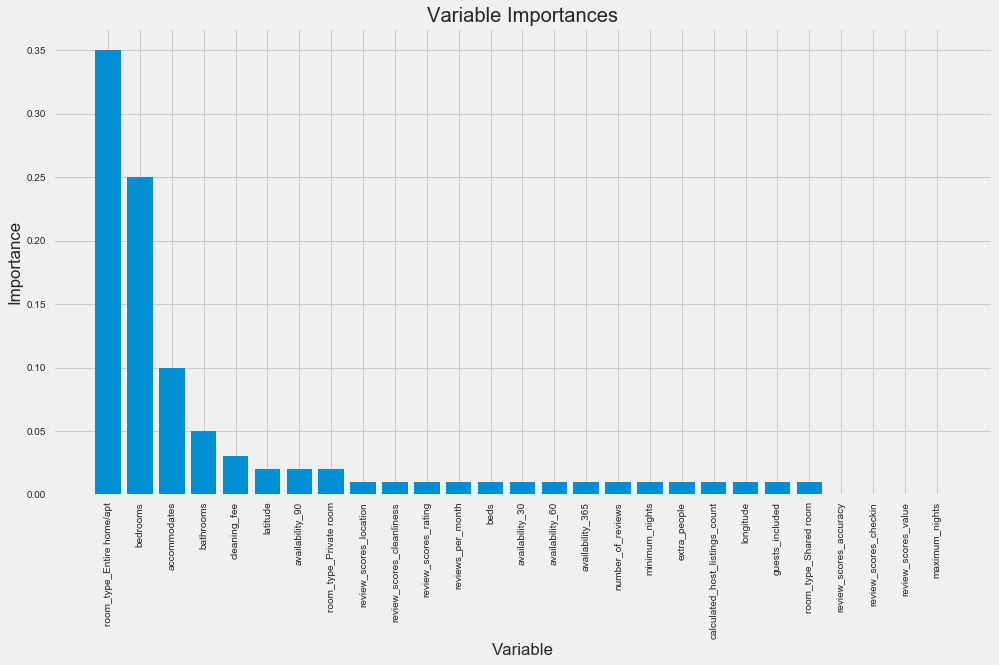

In [208]:
Visualize_ImportantFeatures(X_train,model.feature_importances_) 

bedrooms                                           Importance: 0.30000001192092896
room_type_Private room                             Importance: 0.2199999988079071
accommodates                                       Importance: 0.11999999731779099
room_type_Shared room                              Importance: 0.09000000357627869
cleaning_fee                                       Importance: 0.03999999910593033
bathrooms                                          Importance: 0.029999999329447746
latitude                                           Importance: 0.019999999552965164
review_scores_location                             Importance: 0.009999999776482582
review_scores_cleanliness                          Importance: 0.009999999776482582
review_scores_rating                               Importance: 0.009999999776482582
reviews_per_month                                  Importance: 0.009999999776482582
beds                                               Importance: 0.00999999977648258

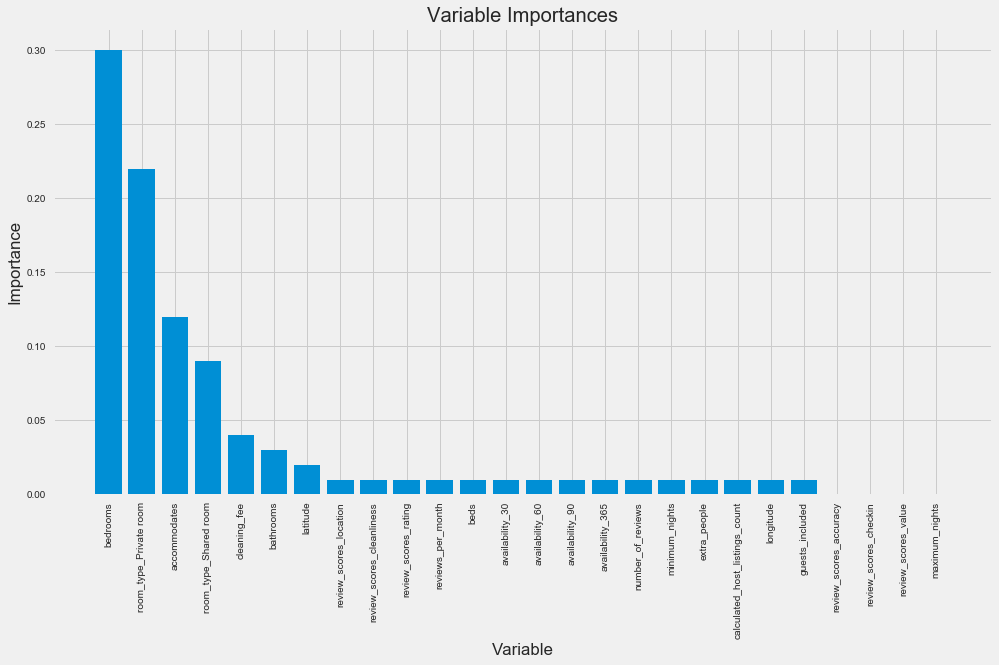

In [229]:
Visualize_ImportantFeatures(X_train,model.feature_importances_) 

## Create dummary variables: app 2

In [210]:
# Approach 1:create dummy variables
room_type = data_df.loc[data_df.room_type.isnull(),'room_type']
room_dummies = pd.get_dummies(data_df[['room_type']], prefix='room_type', prefix_sep='_',drop_first=True)
room_dummies.head()

,room_type_Private room,room_type_Shared room
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [211]:
X_data = pd.concat((X_data,room_dummies.astype(int)),axis=1)
X_data.shape   

(3818, 26)

# Feature Extraction

### Common functions

In [272]:
def Feature_Frequency(df, feature, name):
    feature_frequency = pd.DataFrame(df.groupby(feature).id.count())
    feature_frequency.columns = ['Number_Of_Listings']
    feature_frequency = feature_frequency.reset_index()
    feature_frequency = feature_frequency.sort_values('Number_Of_Listings',ascending=[0])
    plt.figure(figsize=(7, 5))
    feature_frequency.plot(kind='bar', x=feature, y='Number_Of_Listings', title = name + ' ' + feature + ' frequency' , legend = False)
    plt.xlabel(feature)
    plt.ylabel('Frequency')  
    plt.show()
    return feature_frequency

def Feature_Price(df, feature, name):
    feature_price = df.groupby(feature).price.mean()
    feature_price = feature_price.reset_index()
    feature_price = feature_price.rename(columns={'price':'average_Price'})
    feature_price = feature_price.sort_values('average_Price',ascending=[0])
    plt.figure(figsize=(7, 5))
    feature_price.plot(kind='bar', x=feature, y='average_Price', title = name + ' ' + feature + ' average price', legend = False)
    plt.xlabel(feature)
    plt.ylabel('Average Price') 
    plt.show()
    return feature_price

### cancellation_policy 

In [246]:
cancellation_policy_df = listings_df[['cancellation_policy','price','id']]
cancellation_policy_df.cancellation_policy.value_counts()

strict      1417
moderate    1251
flexible    1150
Name: cancellation_policy, dtype: int64

In [275]:
cancellation_policy_df.isnull().sum()

cancellation_policy    0
price                  0
id                     0
dtype: int64

<Figure size 504x360 with 0 Axes>

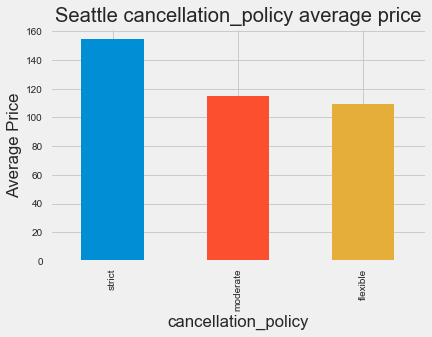

,cancellation_policy,average_Price
2,strict,154.597036
1,moderate,114.775380
0,flexible,109.534783


In [277]:
Feature_Price(cancellation_policy_df,'cancellation_policy','Seattle')

In [278]:
cancel_policy_dummies = pd.get_dummies(listings_df[['cancellation_policy']], prefix='cancel_policy', prefix_sep='_')
cancel_policy_dummies.head()

,cancel_policy_flexible,cancel_policy_moderate,cancel_policy_strict
0,0,1,0
1,0,0,1
2,0,0,1
3,1,0,0
4,0,0,1


In [288]:
X1_data = pd.concat((X_data,cancel_policy_dummies.cancel_policy_strict.astype(int)),axis=1)
X1_data.shape

(3818, 28)

In [289]:
X1_data.head()

,cleaning_fee,review_scores_accuracy,review_scores_checkin,review_scores_value,review_scores_location,review_scores_cleanliness,review_scores_rating,reviews_per_month,bathrooms,bedrooms,beds,latitude,availability_30,availability_60,availability_90,availability_365,number_of_reviews,minimum_nights,maximum_nights,extra_people,calculated_host_listings_count,longitude,guests_included,accommodates,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancel_policy_strict
0,-3.031586e-14,5.726658e-01,3.937630e-01,8.023812e-01,-1.063670e+00,6.112031e-01,7.654173e-02,1.195309e+00,-0.438461,-0.348068,-0.645342,0.170240,-0.228908,0.179356,0.379264,0.798601,4.897864,-0.083987,-0.246795,-0.322324,-0.160602,-1.194754,0.249756,0.329029,1,0,0,0
1,-5.204004e-01,5.726658e-01,3.937630e-01,8.023812e-01,6.831564e-01,6.112031e-01,2.426703e-01,-3.595500e-01,-0.438461,-0.348068,-0.645342,0.236078,-0.311063,-1.020585,-1.235563,0.364696,0.550724,-0.022651,-0.410158,-0.606680,0.518255,-1.025923,-0.513098,0.329029,1,0,0,1
2,5.711680e+00,5.726658e-01,3.937630e-01,8.023812e-01,6.831564e-01,6.112031e-01,4.087988e-01,-5.576595e-01,5.500872,4.183643,4.621311,0.017732,-1.296929,-1.320570,-1.206202,-0.195436,-0.058936,0.100020,-0.445801,0.815098,-0.160602,-1.146171,6.352583,3.869138,1,0,0,1
3,-3.031586e-14,1.119073e-14,-1.049403e-13,1.769432e-13,5.275077e-14,6.363495e-14,-1.487322e-13,-1.439645e-14,-0.438461,-1.480996,0.232433,0.220980,-1.379085,-1.577700,-1.705330,-0.802903,-0.589075,-0.083987,0.204680,-0.606680,-0.330316,-1.139743,-0.513098,-0.176701,1,0,0,0
4,1.517011e+00,-1.002290e+00,3.937630e-01,-6.624741e-01,-1.063670e+00,-7.666159e-01,-4.218439e-01,-7.137458e-01,1.258492,1.917787,1.110209,0.091937,1.085580,0.993601,0.937113,0.948495,0.418189,-0.083987,0.204680,0.246387,-0.330316,-1.240293,3.301169,1.340489,1,0,0,1


In [290]:
X_train, X_test, Y_train, Y_test=train_test_split(X1_data,Y_data, test_size=0.3,train_size = 0.7,random_state=100)

In [291]:
model = xgboost.XGBRegressor(n_estimators=100)
CV_Model(model,X1_data,Y_data)

r2 score:  [0.78295963 0.74317105 0.69341756 0.51031138 0.60924488 0.68657049
 0.73883788 0.66038872 0.65731473 0.6699087 ]
Average r2 score:  0.68
Average rmse score:  0.31


In [292]:
model, Y_train_pred, Y_test_pred = Model_XGBoost(X_train, Y_train,X_test,Y_test,1)

Train R-squared: 0.7800
Test R-squared: 0.7189

Train RMSE: 0.2628091795256108
Test RMSE: 0.30605682174851834


room_type_Entire home/apt                          Importance: 0.3700000047683716
bedrooms                                           Importance: 0.23999999463558197
accommodates                                       Importance: 0.10000000149011612
bathrooms                                          Importance: 0.05000000074505806
cleaning_fee                                       Importance: 0.029999999329447746
latitude                                           Importance: 0.019999999552965164
availability_90                                    Importance: 0.019999999552965164
room_type_Private room                             Importance: 0.019999999552965164
room_type_Shared room                              Importance: 0.019999999552965164
review_scores_location                             Importance: 0.009999999776482582
review_scores_cleanliness                          Importance: 0.009999999776482582
review_scores_rating                               Importance: 0.0099999997764825

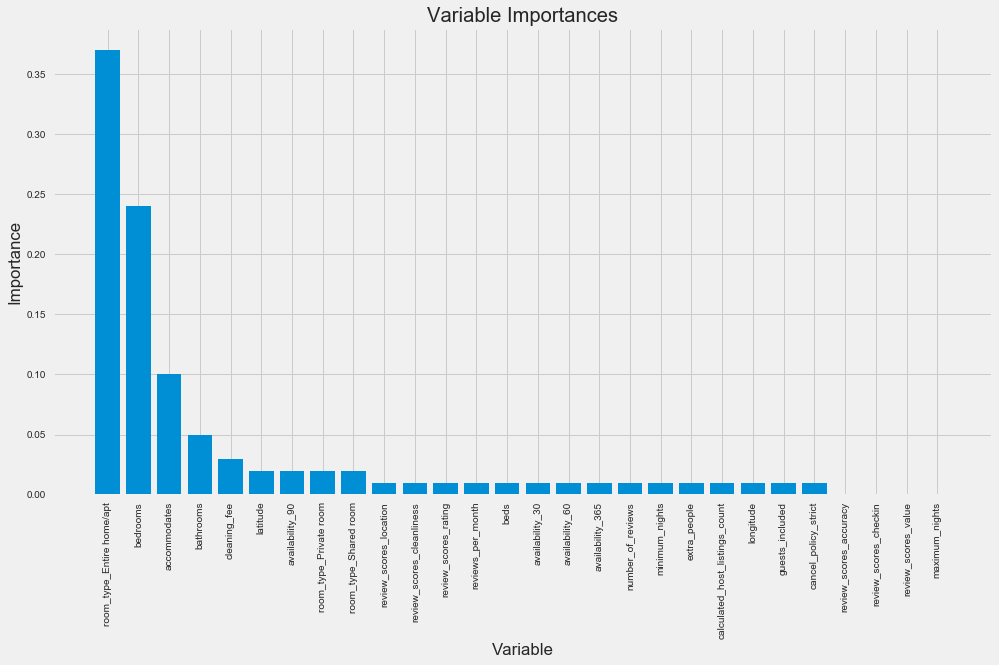

In [293]:
Visualize_ImportantFeatures(X_train,model.feature_importances_) 

In [294]:
Model_LinearRegression1(X_train,Y_train) 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     185.1
Date:                Sun, 14 Apr 2019   Prob (F-statistic):               0.00
Time:                        11:23:39   Log-Likelihood:                -825.80
No. Observations:                2672   AIC:                             1708.
Df Residuals:                    2644   BIC:                             1873.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              3.3127      0.011    289.542      0.000       3.290       3.335
cleaning_fee                       0.0819      0.009      9.239      0.000       0.065       0.099
review_scores_accuracy             0.0245      0.009      2.742      0.006       0.007       0.042
review_scores_checkin             -0.0190      0.008     -2.353      0.019      -0.035      -0.003
review_scores_value               -0.0631      0.009     -6.720      0.000      -0.082      -0.045
review_scores_location             0.0512      0.007      7.075      0.000       0.037       0.065
review_scores_cleanliness          0.0071      0.009      0.779      0.436      -0.011       0.025
review_scores_rating               0.0397      0.011      3.599      0.000       0.018       0.061
reviews_per_month                 -0.0540      0.008     -6.625      0.000      -0.070      -0.038
bathrooms                          0.0552      0.008      6.719      0.000       0.039       0.071
bedrooms                           0.1015      0.012      8.429      0.000       0.078       0.125
beds                              -0.0442      0.014     -3.264      0.001      -0.071      -0.018
latitude                          -0.0229      0.007     -3.488      0.000      -0.036      -0.010
availability_30                    0.0210      0.021      1.025      0.306      -0.019       0.061
availability_60                    0.0456      0.043      1.065      0.287      -0.038       0.130
availability_90                   -0.0535      0.033     -1.641      0.101      -0.117       0.010
availability_365                   0.0267      0.009      3.115      0.002       0.010       0.043
number_of_reviews                 -0.0039      0.008     -0.470      0.638      -0.020       0.012
minimum_nights                    -0.0645      0.044     -1.460      0.144      -0.151       0.022
maximum_nights                    -0.0011      0.023     -0.050      0.960      -0.046       0.044
extra_people                       0.0098      0.007      1.425      0.154      -0.004       0.023
calculated_host_listings_count    -0.0322      0.007     -4.346      0.000      -0.047      -0.018
longitude                         -0.0215      0.007     -3.269      0.001      -0.034      -0.009
guests_included                    0.0229      0.008      2.732      0.006       0.006       0.039
accommodates                       0.1295      0.016      8.135      0.000       0.098       0.161
room_type_Entire home/apt          1.5034      0.014    111.129      0.000       1.477       1.530
room_type_Private room             1.0746      0.014     78.387      0.000       1.048       1.101
room_type_Shared room              0.7348      0.030     24.344      0.000       0.676       0.794
cancel_policy_

### zipcode

In [299]:
zipcode_df = listings_df[['zipcode','price','id']]
zipcode_df.zipcode.value_counts()

98122        420
98103        394
98102        339
98105        225
98109        202
98101        201
98144        200
98121        196
98107        180
98115        178
98112        167
98117        164
98118        154
98119        143
98116        112
98104         95
98125         71
98199         66
98126         63
98106         58
98108         56
98133         46
98136         44
98177         19
98178          7
98146          5
98134          5
99\n98122      1
Name: zipcode, dtype: int64

In [300]:
zipcode_df.isnull().sum()

zipcode    7
price      0
id         0
dtype: int64

<Figure size 504x360 with 0 Axes>

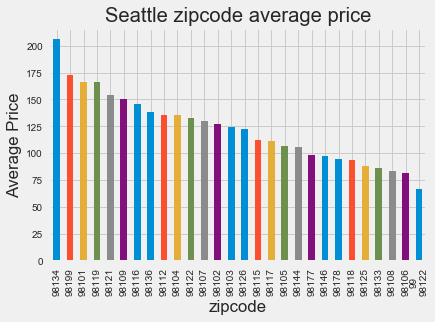

,zipcode,average_Price
20,98134,206.600000
26,98199,172.393939
0,98101,166.721393
14,98119,166.377622
15,98121,153.785714
8,98109,150.247525
11,98116,145.348214
21,98136,137.909091
9,98112,135.437126
3,98104,135.221053


In [301]:
Feature_Price(zipcode_df,'zipcode','Seattle')

In [302]:
X1_data = X_data.copy(deep=True)
X1_data.shape

(3818, 27)

In [305]:
X1_data['zipcode'] = data_df['zipcode']
X1_data.shape

(3818, 28)

In [306]:
X1_data['zipcode'] = pd.to_numeric(X1_data['zipcode'], errors='coerce')
X1_data['zipcode'].value_counts()

98122.0    420
98103.0    394
98102.0    339
98105.0    225
98109.0    202
98101.0    201
98144.0    200
98121.0    196
98107.0    180
98115.0    178
98112.0    167
98117.0    164
98118.0    154
98119.0    143
98116.0    112
98104.0     95
98125.0     71
98199.0     66
98126.0     63
98106.0     58
98108.0     56
98133.0     46
98136.0     44
98177.0     19
98178.0      7
98134.0      5
98146.0      5
Name: zipcode, dtype: int64

In [307]:
X1_data['zipcode'].isnull().sum()

8

In [309]:
X1_data['zipcode'].fillna(0,inplace=True)

In [310]:
X1_data['zipcode']= X1_data['zipcode'].astype(int)

In [311]:
X1_data['zipcode'].value_counts()

98122    420
98103    394
98102    339
98105    225
98109    202
98101    201
98144    200
98121    196
98107    180
98115    178
98112    167
98117    164
98118    154
98119    143
98116    112
98104     95
98125     71
98199     66
98126     63
98106     58
98108     56
98133     46
98136     44
98177     19
0          8
98178      7
98146      5
98134      5
Name: zipcode, dtype: int64

In [313]:
X_train, X_test, Y_train, Y_test=train_test_split(X1_data,Y_data, test_size=0.3,train_size = 0.7,random_state=100)

In [314]:
model, Y_train_pred, Y_test_pred = Model_XGBoost(X_train, Y_train,X_test,Y_test,1)

Train R-squared: 0.7816
Test R-squared: 0.7205

Train RMSE: 0.26182446856944497
Test RMSE: 0.3051685918495294


In [315]:
model = xgboost.XGBRegressor(n_estimators=100)
CV_Model(model,X1_data,Y_data)

r2 score:  [0.78295963 0.74317105 0.69341756 0.51031138 0.60924488 0.68657049
 0.73883788 0.66038872 0.65731473 0.6699087 ]
Average r2 score:  0.68
Average rmse score:  0.31


### neighbourhood_group_cleansed

In [318]:
neighbourhood_group_df = listings_df[['neighbourhood_group_cleansed','price','id']]
neighbourhood_group_df.neighbourhood_group_cleansed.value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

In [319]:
neighbourhood_group_df.isnull().sum()

neighbourhood_group_cleansed    0
price                           0
id                              0
dtype: int64

<Figure size 504x360 with 0 Axes>

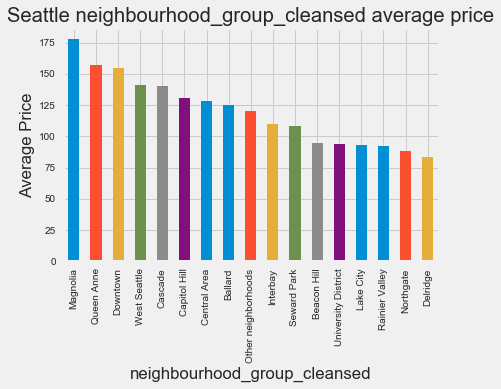

,neighbourhood_group_cleansed,average_Price
9,Magnolia,177.672131
12,Queen Anne,157.223729
6,Downtown,154.405660
16,West Seattle,141.359606
3,Cascade,140.101124
2,Capitol Hill,130.592593
4,Central Area,128.338753
0,Ballard,124.682609
11,Other neighborhoods,119.968514
7,Interbay,109.727273


In [320]:
Feature_Price(neighbourhood_group_df,'neighbourhood_group_cleansed','Seattle')

In [322]:
neighbourhood_group_dummies = pd.get_dummies(neighbourhood_group_df[['neighbourhood_group_cleansed']], prefix='neighbourhood', prefix_sep='_')
neighbourhood_group_dummies.head()

,neighbourhood_Ballard,neighbourhood_Beacon Hill,neighbourhood_Capitol Hill,neighbourhood_Cascade,neighbourhood_Central Area,neighbourhood_Delridge,neighbourhood_Downtown,neighbourhood_Interbay,neighbourhood_Lake City,neighbourhood_Magnolia,neighbourhood_Northgate,neighbourhood_Other neighborhoods,neighbourhood_Queen Anne,neighbourhood_Rainier Valley,neighbourhood_Seward Park,neighbourhood_University District,neighbourhood_West Seattle
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [325]:
X1_data = pd.concat((X_data,neighbourhood_group_dummies),axis=1)
X1_data.shape

(3818, 44)

In [326]:
X_train, X_test, Y_train, Y_test=train_test_split(X1_data,Y_data, test_size=0.3,train_size = 0.7,random_state=100)

In [327]:
model = xgboost.XGBRegressor(n_estimators=100)
CV_Model(model,X1_data,Y_data)

r2 score:  [0.78295963 0.74317105 0.69341756 0.51031138 0.60924488 0.68657049
 0.73883788 0.66038872 0.65731473 0.6699087 ]
Average r2 score:  0.68
Average rmse score:  0.31


### host_is_superhost

In [328]:
data_df.host_is_superhost.value_counts()

f    3038
t     778
Name: host_is_superhost, dtype: int64

<Figure size 504x360 with 0 Axes>

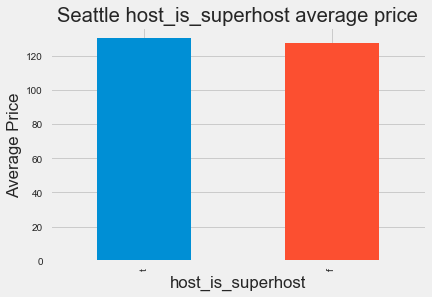

,host_is_superhost,average_Price
1,t,130.140103
0,f,127.391376


In [329]:
Feature_Price(data_df,'host_is_superhost','Seattle')

### host_identity_verified

In [330]:
data_df.host_identity_verified.value_counts()

t    2997
f     819
Name: host_identity_verified, dtype: int64

<Figure size 504x360 with 0 Axes>

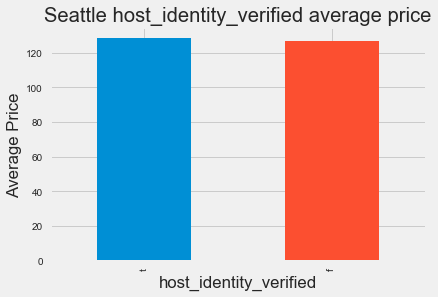

,host_identity_verified,average_Price
1,t,128.205539
0,f,127.023199


In [331]:
Feature_Price(data_df,'host_identity_verified','Seattle')

### host_since

In [341]:
# convert host_since date into number and fill in missing values, drop the original column
data_df['host_since'] = pd.to_datetime(data_df['host_since'])
data_df['host_since_year'] = data_df.host_since.dt.year
data_df['host_since_year'].head()

0    2011.0
1    2013.0
2    2014.0
3    2013.0
4    2011.0
Name: host_since_year, dtype: float64

In [344]:
data_df['host_since_year'].isnull().sum()

0

In [343]:
data_df['host_since_year']=data_df['host_since_year'].fillna(data_df['host_since_year'].min())

In [345]:
data_df['host_since_year']=data_df['host_since_year'].astype(int)

In [346]:
data_df['host_since_year'].head()

0    2011
1    2013
2    2014
3    2013
4    2011
Name: host_since_year, dtype: int32

In [347]:
X1_data = pd.concat((X_data,data_df['host_since_year']),axis=1)
X1_data.shape

(3818, 28)

In [348]:
X_train, X_test, Y_train, Y_test=train_test_split(X1_data,Y_data, test_size=0.3,train_size = 0.7,random_state=100)

In [349]:
model = xgboost.XGBRegressor(n_estimators=100)
CV_Model(model,X1_data,Y_data)

r2 score:  [0.78295963 0.74317105 0.69341756 0.51031138 0.60924488 0.68657049
 0.73883788 0.66038872 0.65731473 0.6699087 ]
Average r2 score:  0.68
Average rmse score:  0.31


### amenities

In [350]:
def count_words(df):
    word_list = []
    for element in df:
        # element = element[1:-1]
        x = element.split()
        word_list.append(len(x))  
    
    return word_list

In [353]:
data_df['num_of_amenities'] = count_words(data_df.amenities)
data_df['num_of_amenities'].head()

0     5
1    14
2    18
3     9
4    10
Name: num_of_amenities, dtype: int64

In [357]:
data_df.columns.values

array(['neighborhood_overview', 'cleaning_fee', 'review_scores_accuracy',
       'review_scores_checkin', 'review_scores_value',
       'review_scores_location', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_rating',
       'reviews_per_month', 'space', 'neighbourhood',
       'host_neighbourhood', 'summary', 'bathrooms', 'zipcode',
       'bedrooms', 'host_identity_verified', 'host_since',
       'host_is_superhost', 'beds', 'property_type', 'host_verifications',
       'description', 'street', 'latitude', 'neighbourhood_cleansed',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'minimum_nights',
       'cancellation_policy', 'require_guest_phone_verification',
       'maximum_nights', 'extra_people', 'neighbourhood_group_cleansed',
       'calculated_host_listings_count', 'longitude', 'guests_included',
       'room_type', 'accommodates', 'bed_type', 'amenities', 'price',
       'log_p

In [360]:
amenities_df = data_df[['num_of_amenities','price']]
amenities_df['id'] = listings_df['id']

In [361]:
amenities_df.isnull().sum()

num_of_amenities    0
price               0
id                  0
dtype: int64

<Figure size 504x360 with 0 Axes>

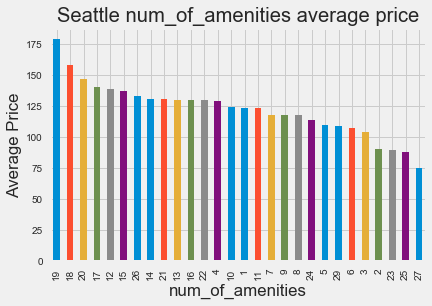

,num_of_amenities,average_Price
18,19,178.788136
17,18,157.675325
19,20,146.603448
16,17,140.437158
11,12,138.861538
14,15,136.893519
25,26,133.333333
13,14,130.575290
20,21,130.434783
12,13,129.858108


In [363]:
Feature_Price(amenities_df,'num_of_amenities','Seattle')

### Categorical features

In [317]:
categorical = ['object']
categoricaldata = data_df.select_dtypes(include=categorical)
categoricaldata.shape      
Check_Missing_Data(categoricaldata)

,Total,Percent
neighborhood_overview,1032,0.270299
space,569,0.149031
neighbourhood,416,0.108958
host_neighbourhood,300,0.078575
summary,177,0.046359
zipcode,7,0.001833
host_is_superhost,2,0.000524
host_identity_verified,2,0.000524
host_since,2,0.000524
property_type,1,0.000262
